# Postprocessing a DeepONet Trained for a 0D Reactor

In [1]:
### Loading Libraries

import os
import sys
import numpy                              as np
import pandas                             as pd

import matplotlib
from matplotlib                           import pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

import tensorflow                         as tf
from tensorflow                           import keras

import romnet                             as rmnt


In [2]:
### Input Data

ROMNetFldr    = WORKSPACE_PATH + '/ROMNet/romnet/'

OutputDir     = WORKSPACE_PATH+'/ROMNet/Data/0DReact_Isobaric_1000Cases_Diff/'
TestDir       = WORKSPACE_PATH+'/ROMNet/Data/0DReact_Isobaric_1000Cases_Diff/'

PathToRunFld  = WORKSPACE_PATH + '/ROMNet/0DReact_Isobaric_1000Cases_Diff/DeepONet/Deterministic/Run_6/'
#PathToRunFld  = WORKSPACE_PATH + '/ROMNet/0DReact_10Cases/DeepONet/MCDropOut/Run_1/'
#PathToRunFld  = WORKSPACE_PATH + '/ROMNet/0DReact_10Cases/DeepONet/BayesByBackprop/Run_1/'

DirDir        = OutputDir

# DirName       = 'test'
# CasesVec      = range(5)#[1,0,2]
DirName       = 'train'
CasesVec      = range(0,100,20)



NSamples      = 1

NVarsRed      = 7

FixedMinVal   = 1.e-14 

POD_NAME      = 'All'

In [3]:
print("\n[ROMNet]: Reading Input File from: ", PathToRunFld)
sys.path.insert(0, PathToRunFld)

print("\n[ROMNet]: Keep Loading Modules and Functions...")
from ROMNet_Input import inputdata

print("\n[ROMNet]: Initializing Input ...")
InputData               = inputdata(WORKSPACE_PATH, ROMNetFldr)


InputData.InputFilePath = PathToRunFld+'/ROMNet_Input.py'
InputData.TrainIntFlg   = 0
InputData.PathToRunFld  = PathToRunFld


[ROMNet]: Reading Input File from:  /Users/sventur/WORKSPACE//ROMNet/0DReact_Isobaric_1000Cases_Diff/DeepONet/Deterministic/Run_6/

[ROMNet]: Keep Loading Modules and Functions...

[ROMNet]: Initializing Input ...


In [4]:
SurrogateType = InputData.SurrogateType
if (SurrogateType == 'FNN-SourceTerms'):
    SurrogateType = 'FNN'

Net   = getattr(rmnt.nn, SurrogateType)

model = rmnt.model.Model_Deterministic(InputData)

model.build(InputData, None, Net)#, loadfile_no='000027')

NN    = model.net


[ROMNet]:   Initializing the ML Model

[ROMNet]:   Building the ML Model
tShift =  [<tf.Tensor 'split_1:0' shape=(1, 1) dtype=float32>, <tf.Tensor 'split_1:1' shape=(1, 1) dtype=float32>, <tf.Tensor 'split_1:2' shape=(1, 1) dtype=float32>, <tf.Tensor 'split_1:3' shape=(1, 1) dtype=float32>, <tf.Tensor 'split_1:4' shape=(1, 1) dtype=float32>, <tf.Tensor 'split_1:5' shape=(1, 1) dtype=float32>, <tf.Tensor 'split_1:6' shape=(1, 1) dtype=float32>]

[ROMNet]:   Loading ML Model Parameters from File:  /Users/sventur/WORKSPACE//ROMNet/0DReact_Isobaric_1000Cases_Diff/DeepONet/Deterministic/Run_6//Training/Params//007665.h5
'load_params' took 0.147171 s


[ROMNet]:   Saving ML Model Parameters to File:  /Users/sventur/WORKSPACE//ROMNet/0DReact_Isobaric_1000Cases_Diff/DeepONet/Deterministic/Run_6//Model/Params/Initial.h5
'save_params' took 0.152144 s

'build' took 3.888684 s



In [5]:
FileName = OutputDir+'/'+str(NVarsRed)+'PC/ROM/A.csv'
A        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

FileName = OutputDir+'/'+str(NVarsRed)+'PC/ROM/C.csv'
C        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

FileName = OutputDir+'/'+str(NVarsRed)+'PC/ROM/D.csv'
D        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

FileName    = OutputDir+'/'+str(NVarsRed)+'PC/ROM/ToOrig_Mask.csv'
ToOrig_Mask = pd.read_csv(FileName, delimiter=',', header=None).to_numpy(int)[:,0]

In [6]:
### Evaluating on Test Data


FileName = DirDir + '/Orig/train/ext/y.csv.1'
Data     = pd.read_csv(FileName, header=0)
VarNames = list(Data.columns)
VarNames.remove('t')

FileName     = DirDir + '/Orig/train/ext/CleanVars.csv'
Data         = pd.read_csv(FileName, header=0)
VarNamesAnti = list(Data.columns)

        
        
Vars = []
for iVars in range(1,NVarsRed+1):
    Vars.append('PC_'+str(iVars))

Vars0 = []
for iVars in range(1,NVarsRed+1):
    Vars0.append('PC0_'+str(iVars))
    
SVars = []
for iVars in range(1,NVarsRed+1):
    SVars.append('SPC_'+str(iVars))
    


FileName     = OutputDir + '/Orig/'+DirName+'/ext/SimIdxs.csv'
Data         = pd.read_csv(FileName, header=0)
SimIdxs      = Data.to_numpy(int)

FileName     = OutputDir + '/Orig/'+DirName+'/ext/ICs.csv'
Data         = pd.read_csv(FileName)
ICVecs       = Data.to_numpy()
NICs         = len(ICVecs)

In [7]:
InputVars = Vars0+['t']
#InputVars = ['T0']+['t']
InputVars

['PC0_1', 'PC0_2', 'PC0_3', 'PC0_4', 'PC0_5', 'PC0_6', 'PC0_7', 't']

T =  1606.5 K


<ipython-input-8-4f4e2ff3e349>:55: RuntimeWarning: divide by zero encountered in log10
  Data0['log10(t)']= np.log10(tVec)
<ipython-input-8-4f4e2ff3e349>:56: RuntimeWarning: divide by zero encountered in log
  Data0['log(t)']  = np.log(tVec)


tShift =  [<tf.Tensor 'deep_o_net/split_1:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'deep_o_net/split_1:1' shape=(None, 1) dtype=float32>, <tf.Tensor 'deep_o_net/split_1:2' shape=(None, 1) dtype=float32>, <tf.Tensor 'deep_o_net/split_1:3' shape=(None, 1) dtype=float32>, <tf.Tensor 'deep_o_net/split_1:4' shape=(None, 1) dtype=float32>, <tf.Tensor 'deep_o_net/split_1:5' shape=(None, 1) dtype=float32>, <tf.Tensor 'deep_o_net/split_1:6' shape=(None, 1) dtype=float32>]
T =  1382.5 K
T =  1721.5 K


<ipython-input-8-4f4e2ff3e349>:55: RuntimeWarning: divide by zero encountered in log10
  Data0['log10(t)']= np.log10(tVec)
<ipython-input-8-4f4e2ff3e349>:56: RuntimeWarning: divide by zero encountered in log
  Data0['log(t)']  = np.log(tVec)
<ipython-input-8-4f4e2ff3e349>:55: RuntimeWarning: divide by zero encountered in log10
  Data0['log10(t)']= np.log10(tVec)
<ipython-input-8-4f4e2ff3e349>:56: RuntimeWarning: divide by zero encountered in log
  Data0['log(t)']  = np.log(tVec)


T =  1664.5 K
T =  1755.5 K


<ipython-input-8-4f4e2ff3e349>:55: RuntimeWarning: divide by zero encountered in log10
  Data0['log10(t)']= np.log10(tVec)
<ipython-input-8-4f4e2ff3e349>:56: RuntimeWarning: divide by zero encountered in log
  Data0['log(t)']  = np.log(tVec)
<ipython-input-8-4f4e2ff3e349>:55: RuntimeWarning: divide by zero encountered in log10
  Data0['log10(t)']= np.log10(tVec)
<ipython-input-8-4f4e2ff3e349>:56: RuntimeWarning: divide by zero encountered in log
  Data0['log(t)']  = np.log(tVec)


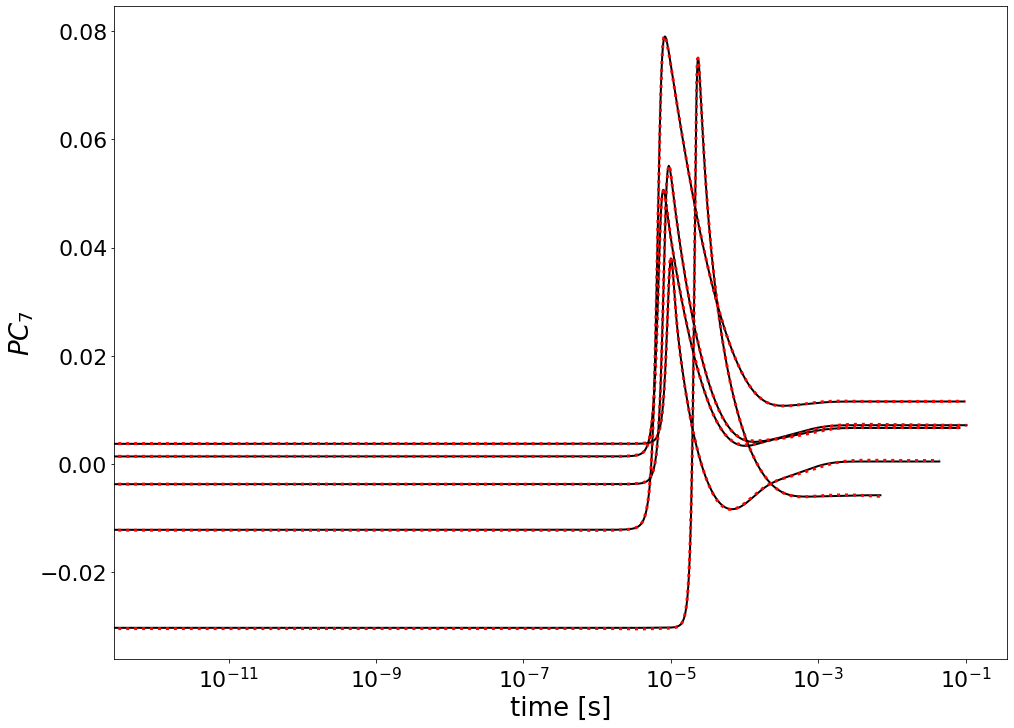

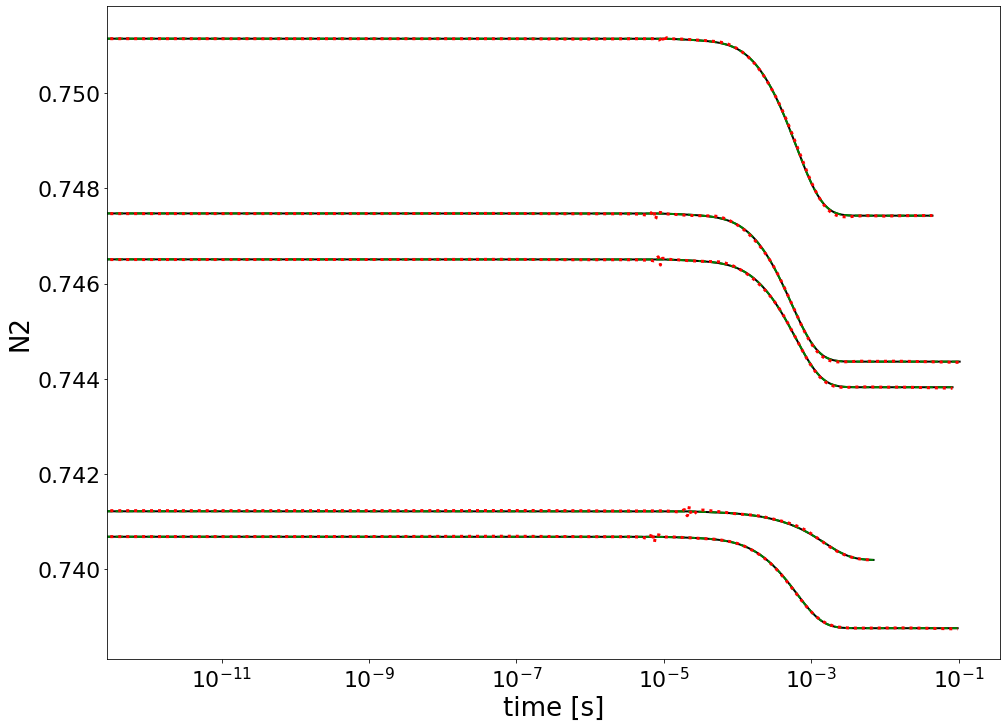

In [8]:
iPC      = 6

VarOI    = 'N2'

if (POD_NAME == 'All'):
    jPC = iPC
else:
    jPC = 0


iVar     = VarNames.index(VarOI)
iVarAnti = VarNamesAnti.index(VarOI)



ax  = []

fig = plt.figure(figsize=(16,12))
ax.append(plt.axes())

fig = plt.figure(figsize=(16,12))
ax.append(plt.axes())
for iTest in CasesVec:
    Nts              = SimIdxs[iTest,1]-SimIdxs[iTest,0]
    P0Vec            = np.ones(Nts, dtype=np.float64)*ICVecs[iTest,0]
    EqRatio0Vec      = np.ones(Nts, dtype=np.float64)*ICVecs[iTest,1]
    T0Vec            = np.ones(Nts, dtype=np.float64)*ICVecs[iTest,2]
    
    
    #####################################################################################################
    FileName     = DirDir + '/Orig/'+DirName+'/ext/y.csv.'+str(iTest+1)
    Data         = pd.read_csv(FileName, header=0)
    tVec         = Data.to_numpy()[:,0]
    tVec[tVec == 0.] = FixedMinVal
    y_Data       = Data[VarNames].to_numpy()
    print('T = ', Data['T'].to_numpy()[0], 'K')
    

    #####################################################################################################
    if (POD_NAME == 'All'):
        FileName         = OutputDir+'/'+str(NVarsRed)+'PC/train/ext/PC.csv.'+str(iTest+1)
        Data             = pd.read_csv(FileName, header=0)
        tVec             = np.maximum(Data['t'].to_numpy(), -1)#FixedMinVal)
        yPCA_Data        = Data[Vars].to_numpy()
        Data0            = Data[Data['t'] == 0.][Vars]
    yPCA_Data        = ((y_Data[:,ToOrig_Mask] - C[:,0])/D[:,0]).dot(A.T)
    yPre_Data        = yPCA_Data.dot(A)
    yAnti_Data       = yPre_Data * D[:,0] + C[:,0]
    Data0            = pd.DataFrame([yPCA_Data[1,:]], columns=Vars0)
    
    Data0            = Data0.loc[Data0.index.repeat(Nts)]
    Data0.columns    = Vars0
    Data0['T0']      = T0Vec
    Data0['t']       = tVec
    Data0['log10(t)']= np.log10(tVec)
    Data0['log(t)']  = np.log(tVec)
    Data0.reset_index(drop=True, inplace=True)
        
    
    ax[0].plot(tVec, yPCA_Data[:,iPC], '-k',  label='From ODE', lw=2)
    if (POD_NAME == 'All'):
        ax[1].plot(tVec, y_Data[:,iVar],  '-k',  label='From ODE', lw=2)
        ax[1].plot(tVec, yAnti_Data[:,iVarAnti], '--g',  label='From PCA', lw=2)

    
    if (InputData.ProbApproach == 'Deterministic') and (NSamples == 1):
        
        yPCA_Pred  = model.predict(Data0[InputVars])
        ax[0].plot(tVec, yPCA_Pred[:,jPC], 'r:', label='DeepONet', lw=3)

        if (POD_NAME == 'All'):
            yPre_Pred  = yPCA_Pred.dot(A)
            yAnti_Pred = (yPre_Pred)*D[:,0] + C[:,0]
            ax[1].plot(tVec, yAnti_Pred[:,iVarAnti], 'r:', label='DeepONet', lw=3)
        
    else:
        
        ### Sampling NN
        yPCA_Pred_sum  = np.zeros((yPCA_Data.shape[0], yPCA_Data.shape[1]))
        yPCA_Pred_sqr  = np.zeros((yPCA_Data.shape[0], yPCA_Data.shape[1]))
        if (POD_NAME == 'All'):
            yAnti_Pred_sum = np.zeros((yAnti_Data.shape[0], A.shape[1]))
            yAnti_Pred_sqr = np.zeros((yAnti_Data.shape[0], A.shape[1]))

        for iSample in range(NSamples):
            yPCA_Pred = model.predict(Data0[InputVars])
            
            yPCA_Pred_sum  += yPCA_Pred
            yPCA_Pred_sqr  += yPCA_Pred**2
            
            if (POD_NAME == 'All'):
                yAnti_Pred      = (yPCA_Pred.dot(A))*D[:,0] + C[:,0]
                yAnti_Pred_sum += yAnti_Pred
                yAnti_Pred_sqr += yAnti_Pred**2
            
        yMat_pca_mean = yPCA_Pred_sum/NSamples
        yMat_pca_std  = np.sqrt( yPCA_Pred_sqr/NSamples - yMat_pca_mean**2 )
        yMat_pca_p1   = yMat_pca_mean + 1.*yMat_pca_std
        yMat_pca_m1   = yMat_pca_mean - 1.*yMat_pca_std
        yMat_pca_p2   = yMat_pca_mean + 2.*yMat_pca_std
        yMat_pca_m2   = yMat_pca_mean - 2.*yMat_pca_std
        yMat_pca_p3   = yMat_pca_mean + 3.*yMat_pca_std
        yMat_pca_m3   = yMat_pca_mean - 3.*yMat_pca_std
            
        if (POD_NAME == 'All'):
            yMat_mean = yAnti_Pred_sum/NSamples
            yMat_std  = np.sqrt( yAnti_Pred_sqr/NSamples - yMat_mean**2 )
            yMat_p1   = yMat_mean + 1.*yMat_std
            yMat_m1   = yMat_mean - 1.*yMat_std
            yMat_p2   = yMat_mean + 2.*yMat_std
            yMat_m2   = yMat_mean - 2.*yMat_std
            yMat_p3   = yMat_mean + 3.*yMat_std
            yMat_m3   = yMat_mean - 3.*yMat_std
    
        ax[0].plot(tVec, yMat_pca_mean[:,iPC], 'b-', label=r'DeepONet, $\mu$')
        ax[0].plot(tVec, yMat_pca_p3[:,iPC],   'b:', label=r'DeepONet, $\mu+3\sigma$')
        ax[0].plot(tVec, yMat_pca_m3[:,iPC],   'b:', label=r'DeepONet, $\mu-3\sigma$')

        if (POD_NAME == 'All'):
            ax[1].plot(tVec, yMat_mean[:,iVarAnti],  'b-', label=r'DeepONet, $\mu$')
            ax[1].plot(tVec, yMat_p3[:,iVarAnti],    'b:', label=r'DeepONet, $\mu+3\sigma$')
            ax[1].plot(tVec, yMat_m3[:,iVarAnti],  'b:', label=r'DeepONet, $\mu-3\sigma$')
    
    
ax[0].set_xscale('log')

ax[0].set_xlabel('time [s]')
ax[0].set_ylabel(r'$PC_'+str(iPC+1)+'$')
#ax[0].set_xlim([1.e-8,1.e-2])
#ax[0].legend()

if (POD_NAME == 'All'):
    ax[1].set_xscale('log')
    ax[1].set_xlabel('time [s]')
    ax[1].set_ylabel(VarOI)
    #ax[1].set_xlim([1.e-8,1.e-2])
    #ax[1].legend()

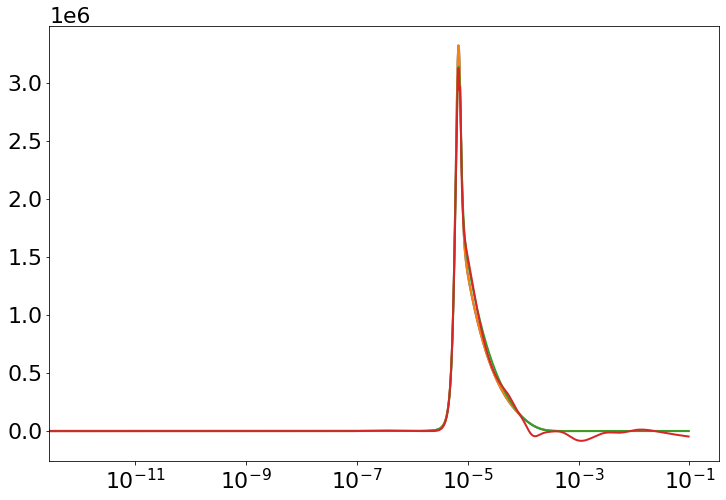

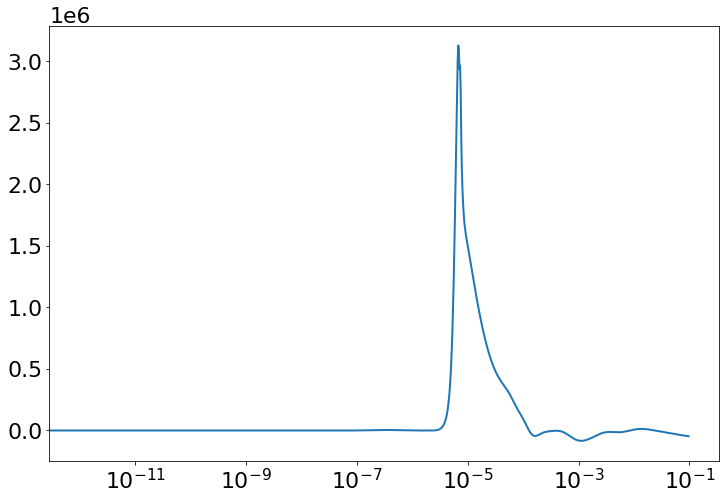

In [9]:
if (POD_NAME == 'All'):
    
    VarOI    = 'T'

    iVar     = VarNames.index(VarOI)
    iVarAnti = VarNamesAnti.index(VarOI)


    FileName      = DirDir + '/Orig/'+DirName+'/ext/ySource.csv.' + str(iTest+1)
    DataSource    = pd.read_csv(FileName, header=0)
    dydtAnti_Data = DataSource[VarNamesAnti].to_numpy()
    dydtPre_Data  = dydtAnti_Data/D.T


    ZeroDR  = rmnt.pinn.system.ZeroDR(InputData)

    yPre_RealData      = (y_Data[:,ZeroDR.to_orig] - ZeroDR.C) / ZeroDR.D
    dydtPre_RealData_f = ZeroDR.f(0., yPre_RealData, None)
    dydtPre_RealData_n = np.gradient(yPre_RealData[:,iVarAnti], tVec) #* tVec[:,0]

    dydtPre_Data_f     = ZeroDR.f(0., yPre_Data, None)
    dydtPre_Data_n     = np.gradient(yPre_Data[:,iVarAnti], tVec) #* tVec[:,0]

    dydtPre_Pred_f     = ZeroDR.f(0., yPre_Pred,  None)
    dydtPre_Pred_n     = np.gradient(yPre_Pred[:,iVarAnti], tVec) #* tVec[:,0]

    fig = plt.figure(figsize=(12,8))
    plt.plot(tVec, dydtPre_Data[:,iVarAnti])
    plt.plot(tVec, dydtPre_RealData_f[:,iVarAnti])
    plt.plot(tVec, dydtPre_Data_f[:,iVarAnti])
    plt.plot(tVec, dydtPre_Pred_f[:,iVarAnti])
    plt.xscale('log')
    # plt.xlim([1.e-14,1.e-13])
    # plt.ylim([-1e9, 1e7])


    fig = plt.figure(figsize=(12,8))

    #plt.plot(tVec, dydtPre_RealData_f[:,iVarAnti])
    #plt.plot(tVec, dydtPre_RealData_n)

    # plt.plot(tVec, dydtPre_Data_f[:,iVarAnti])
    #plt.plot(tVec, dydtPre_Data_n)

    plt.plot(tVec, dydtPre_Pred_f[:,iVarAnti])
    #plt.plot(tVec, dydtPre_Pred_n)

    plt.xscale('log')
    # plt.xlim([1.e-14,1.e-13])
    # plt.ylim([-1e9, 1e7])

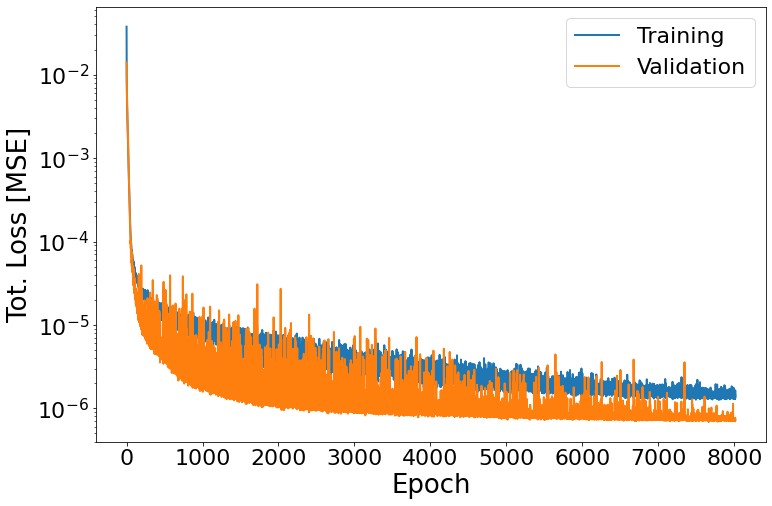

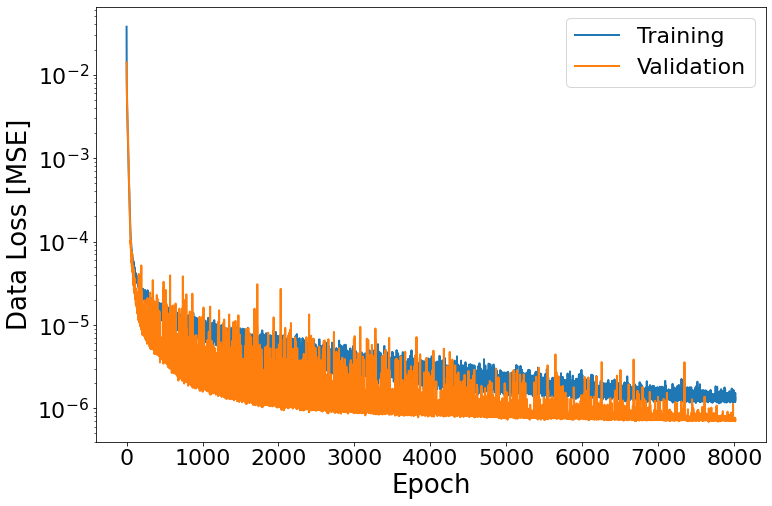

In [10]:
Data = pd.read_csv(PathToRunFld+'/Training/History.csv')

fig  = plt.figure(figsize=(12,8))
plt.plot(Data['tot_loss'],     label='Training')
plt.plot(Data['val_tot_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Tot. Loss [MSE]')
plt.legend()
plt.yscale('log')

# fig  = plt.figure(figsize=(12,8))
# plt.plot(Data['res_loss'],     label='Training')
# plt.plot(Data['val_res_loss'], label='Validation')
# plt.xlabel('Epoch')
# plt.ylabel('Residual Loss [MSE]')
# plt.legend()
# plt.yscale('log')


fig  = plt.figure(figsize=(12,8))
plt.plot(Data['pts_loss'],     label='Training')
plt.plot(Data['val_pts_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Data Loss [MSE]')
plt.legend()
plt.yscale('log')

# fig  = plt.figure(figsize=(12,8))
# plt.plot(Data['scs_loss'],     label='Training')
# plt.plot(Data['val_scs_loss'], label='Validation')
# plt.xlabel('Epoch')
# plt.ylabel('S.C.s Loss [MSE]')
# plt.legend()
# plt.yscale('log')

# fig  = plt.figure(figsize=(12,8))
# plt.plot(Data['ics_loss'],     label='Training')
# plt.plot(Data['val_ics_loss'], label='Validation')
# plt.xlabel('Epoch')

# plt.ylabel('I.C.s Loss [MSE]')
# plt.legend()
# plt.yscale('log')

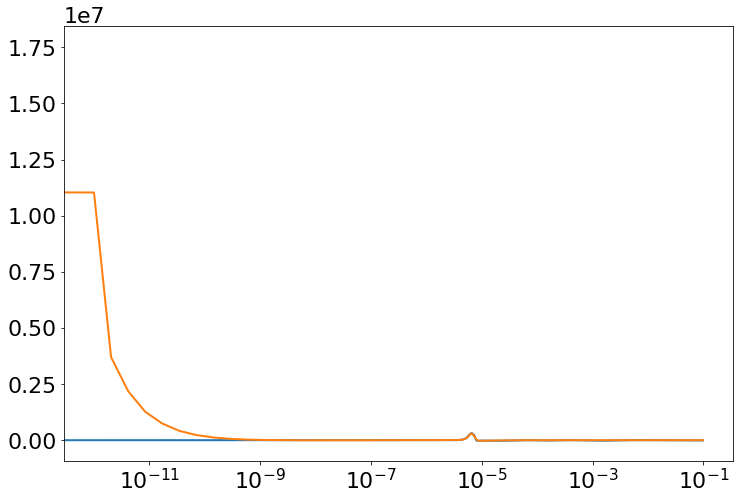

In [11]:
iPC = 6

FileName       = OutputDir+'/'+str(NVarsRed)+'PC/train/ext/PC.csv.'+str(iTest+1)
Data           = pd.read_csv(FileName, header=0)
tVec           = np.maximum(Data['t'].to_numpy(), -1)#FixedMinVal)
yPCA_Data      = Data[Vars].to_numpy()

FileName       = OutputDir+'/'+str(NVarsRed)+'PC/train/ext/PCSource.csv.'+str(iTest+1)
DataSource     = pd.read_csv(FileName, header=0)
dPCdt_Data     = DataSource[SVars].to_numpy()

dPCdt_Data_f   = ZeroDR.f_pc(0., yPCA_Data,  None)
dPCdt_Data_n   = np.gradient(yPCA_Data[:,iPC], tVec) #* tVec[:,0]

dPCdt_Pred_f   = ZeroDR.f_pc(0., yPCA_Pred,  None)
dPCdt_Pred_n   = np.gradient(yPCA_Pred[:,iPC], tVec) #* tVec[:,0]



fig = plt.figure(figsize=(12,8))

#plt.plot(tVec, dPCdt_Data[:,iPC])

#plt.plot(tVec, dPCdt_Data_f[:,iPC])
#plt.plot(tVec, dPCdt_Data_n)

plt.plot(tVec, dPCdt_Pred_f[:,iPC]/model.y_range[iPC])
plt.plot(tVec, dPCdt_Pred_n/model.y_range[iPC])

plt.xscale('log')
# plt.xlim([1.e-14,1.e-13])
# plt.ylim([-1e9, 1e7])

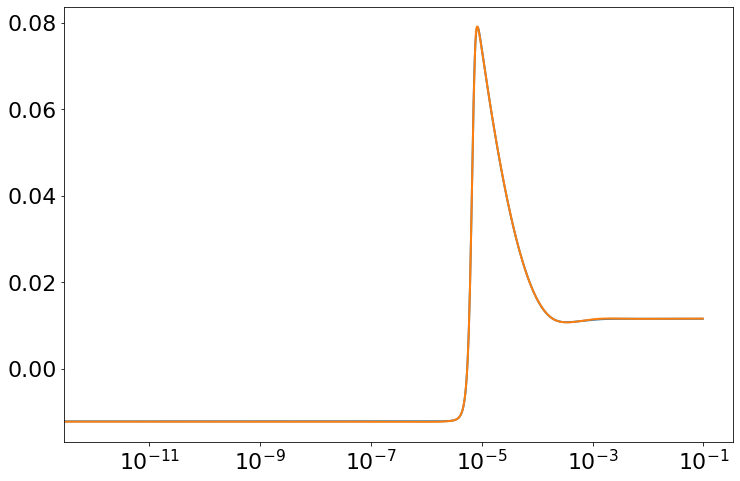

In [12]:
fig = plt.figure(figsize=(12,8))
plt.plot(tVec, yPCA_Data[:,iPC])
plt.plot(tVec, yPCA_Pred[:,iPC])
plt.xscale('log')
# plt.xlim([1.e-14,1.e-13])
# plt.ylim([-1e9, 1e7])

In [13]:
# iPC = 0

# fig = plt.figure(figsize=(12,8))

# DataIn = pd.read_csv('/Users/sventur/Desktop/DAJE/Input.csv', header=None).to_numpy()
# plt.plot(DataIn[:,0], DataIn[:,iPC+1], 'o')

# plt.plot(tVec, yPCA_Pred[:,iPC])

# plt.xscale('log')

In [14]:
# Data = pd.read_csv('/Users/sventur/Desktop/DAJE/Output.csv', header=None).to_numpy()

# dPCdt_Pred_f   = ZeroDR.f_pc(0., DataIn[:,1:],  None)
# #dPCdt_Pred_n   = np.gradient(DataIn[-1000:-1,iPC+1], DataIn[-1000:-1,0]) #* tVec[:,0]



# fig = plt.figure(figsize=(12,8))

# plt.plot(Data[-1000:-1,0], Data[-1000:-1,iPC+1],   'b+', markersize=4)
# #plt.plot(DataIn[-1000:-1,0], dPCdt_Pred_n/model.y_range[iPC], 'ro', markersize=1)

# plt.xscale('log')
# # plt.xlim([-5, -4])
# # plt.ylim([-1, -0.9])



# fig = plt.figure(figsize=(12,8))

# plt.plot(Data[-1000:-1,0], Data[-1000:-1,iPC+6], 'g+', markersize=8)
# plt.plot(DataIn[-1000:-1,0], dPCdt_Pred_f[-1000:-1,iPC]/model.y_range[iPC], 'ro', markersize=1)

# plt.xscale('log')
# # plt.xlim([-5, -4])
# # plt.ylim([-1, -0.9])

In [15]:
# Data    = pd.read_csv(OutputDir+'/Orig/train/ext/ICs.csv')

# ICs      = np.zeros((5,2))
# ICs[:,0] = [2.5, 1.9, 3.5, 1., 3.6]
# ICs[:,1] = [1200., 1900., 1300., 1600., 1700.]

# plt.figure(figsize=(10,10))
# plt.plot(Data.EqRatio, Data['T'], 'o')
# plt.plot(ICs[:,0],ICs[:,1],'ro')
# plt.xlabel('Eq Ratio')
# plt.ylabel('T [K]')

Text(0, 0.5, '$\\Psi_{7_{1}}$')

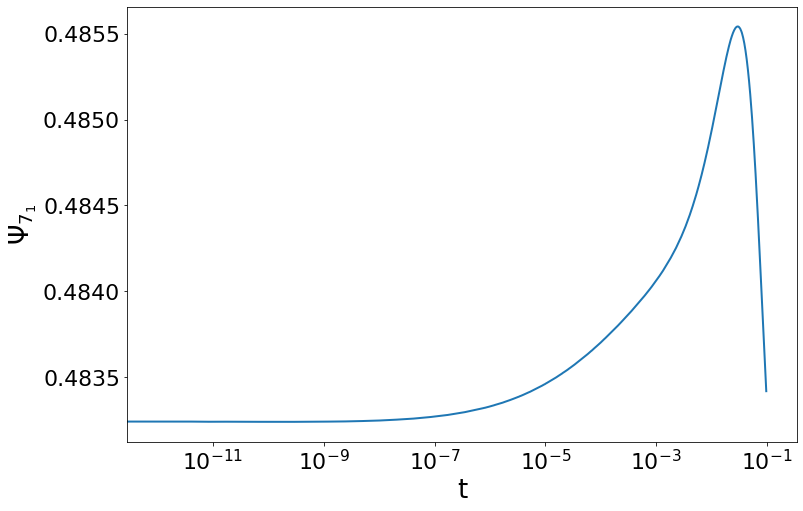

In [16]:
iTrunk  = 6
iVar    = 0



LName   = 'Trunk_1_HL' + str(len(InputData.TrunkActFun[iTrunk]))

inputs  = tf.keras.Input(shape=(1,))

Output_ = inputs
for i in range(len(model.net.TrunkLayersVecs[iTrunk])):
    Layer   = model.net.TrunkLayersVecs[iTrunk][i]
    Output_ = Layer(Output_)

Trunk = keras.Model(inputs=inputs, outputs=Output_)
#Trunk.summary()

output_ = Trunk.predict(tVec[...,np.newaxis])



fig = plt.figure(figsize=(12,8))
plt.plot(tVec, output_[:,iVar])
#plt.xlim([1.e-6, 1.e-2])
plt.xscale('log')
plt.xlabel('t')
plt.ylabel(r'$\Psi_{'+str(iTrunk+1)+'_{'+str(iVar+1)+'}}$')

In [17]:
FileName     = OutputDir + '/Orig/train/ext/SimIdxs.csv'
Data         = pd.read_csv(FileName, header=0)
SimIdxs      = Data.to_numpy(int)


FileName     = OutputDir + '/Orig/train/ext/ICs.csv'
Data         = pd.read_csv(FileName)
ICVecs       = Data.to_numpy()
NICs         = len(ICVecs)

Cols   = []
NewFlg = True
for iC in range(NICs):

    Nts                  = SimIdxs[iC,1]-SimIdxs[iC,0]
    NtsNow               = Nts



    FileName             = OutputDir+'/'+str(NVarsRed)+'PC/train/ext/PC.csv.'+str(iC+1)
    Data                 = pd.read_csv(FileName, header=0)

    DataICTemp  = Data[['PC_'+str(iPC+1) for iPC in range(NVarsRed)]].iloc[0]

    if (NewFlg):
        DataIC           = DataICTemp
        NewFlg           = False
    else:
        DataIC           = pd.concat([DataIC, DataICTemp], axis=1)
        Cols.append(str(iC+1))

tVec              = Data['t']
DataIC            = DataIC.T.reset_index(drop=True, inplace=False)

Text(0.5, 0, '$\\alpha_{1_D}$')

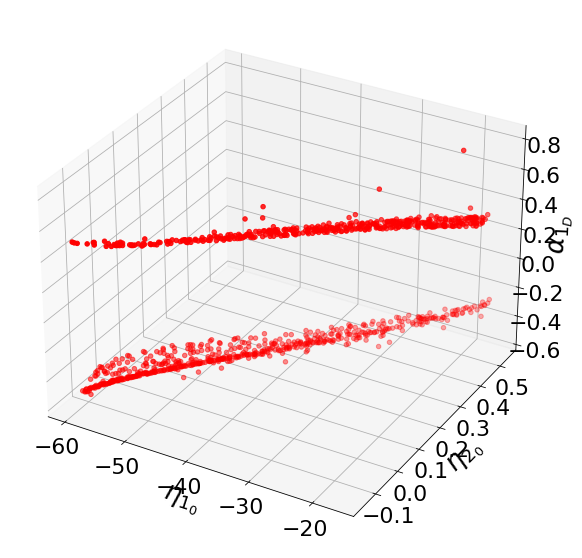

In [18]:
iBranch = 0
iVar    = 9



LName   = 'Brunch_PC_1_HL' + str(len(InputData.BranchActFun[iBranch]))

inputs  = tf.keras.Input(shape=(7,))

Output_ = inputs
for i in range(len(model.net.BranchLayersVecs[iBranch])):
    Layer   = model.net.BranchLayersVecs[iBranch][i]
    Output_ = Layer(Output_)

Branch = keras.Model(inputs=inputs, outputs=Output_)
#Branch.summary()

output_ = Branch.predict(DataIC)
output_.shape



#%matplotlib qt

fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')
ax.scatter(DataIC['PC_1'], DataIC['PC_2'], output_[:,iVar], c='r')
ax.set_xlabel(r'$\eta_{'+str(1)+'_0}$')
ax.set_ylabel(r'$\eta_{'+str(2)+'_0}$')
#ax.set_zlabel(r'$\alpha_{'+str(iBranch+1)+'_{'+str(iVar+1)+'}}$')
ax.set_zlabel(r'$\alpha_{'+str(iBranch+1)+'_D}$')

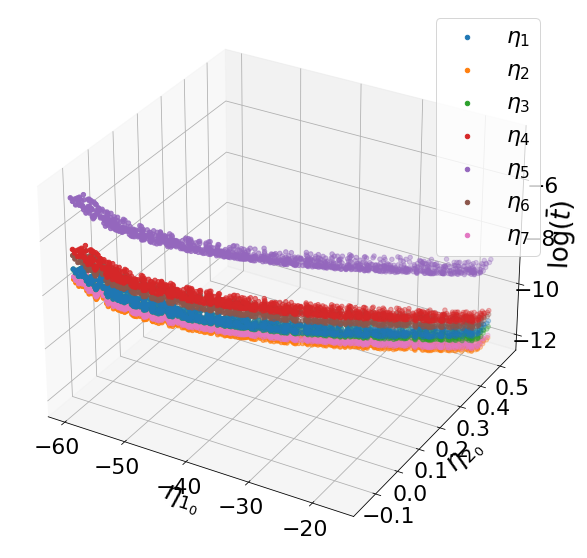

In [19]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')


#for iTrunk in range(7):

LName   = 'tShift_PC_1_HL' + str(len(InputData.tShiftActFun[0]))

inputs  = tf.keras.Input(shape=(7,))

Output_ = inputs
for i in range(len(model.net.tShiftLayersVecs[0])):
    Layer   = model.net.tShiftLayersVecs[0][i]
    Output_ = Layer(Output_)


tShift = keras.Model(inputs=inputs, outputs=Output_)
#tShift.summary()

output_ = tShift.predict(DataIC)
output_.shape

for iBranch in range(7):
    #ax.scatter(DataIC['PC_1'], DataIC['PC_2'], np.exp(output_[:,iBranch]))
    ax.scatter(DataIC['PC_1'], DataIC['PC_2'], output_[:,iBranch], label=r'$\eta_{'+str(iBranch+1)+'}$')


ax.set_xlabel(r'$\eta_{'+str(1)+'_0}$')
ax.set_ylabel(r'$\eta_{'+str(2)+'_0}$')
ax.set_zlabel(r'$\log(\bar{t})$')
ax.legend()
#ax.set_zscale('log')

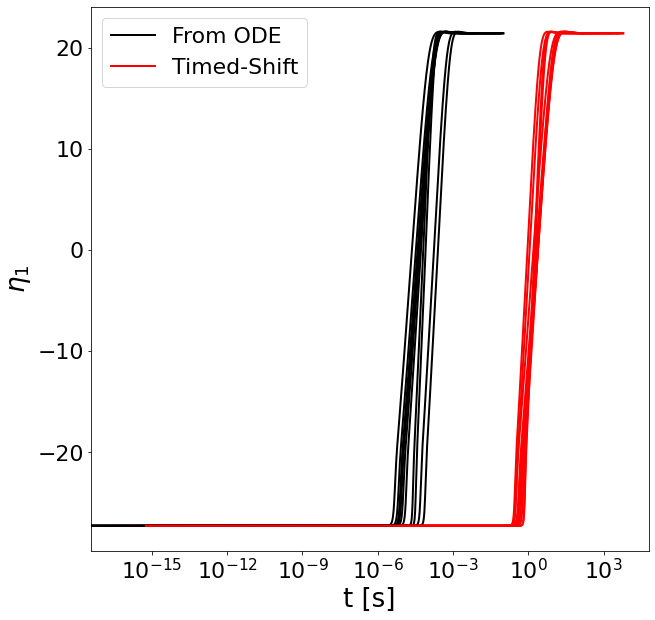

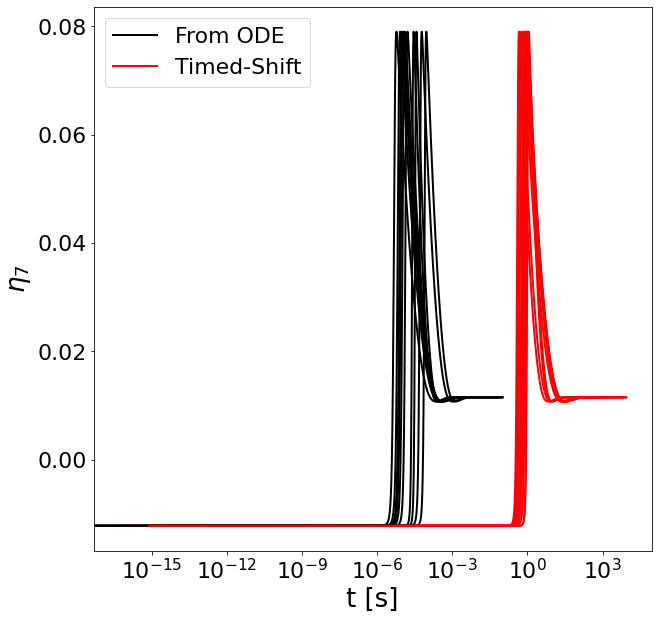

In [20]:
iPCVec   = [0,6]

iTestVec = np.arange(0,100,10)

for iPC in iPCVec:

    NewFlg = True
    fig    = plt.figure(figsize=(10,10))
    for iTest in iTestVec:

        
        FileName         = OutputDir+'/'+str(NVarsRed)+'PC/train/ext/PC.csv.'+str(iTest+1)
        Data             = pd.read_csv(FileName, header=0)
        tVec             = np.maximum(Data['t'].to_numpy(), -1)#FixedMinVal)
        yPCA_Data        = Data[Vars].to_numpy()
        Data0            = Data[Data['t'] == 0.][Vars]
        yPCA_Data        = ((y_Data[:,ToOrig_Mask] - C[:,0])/D[:,0]).dot(A.T)
        yPre_Data        = yPCA_Data.dot(A)
        yAnti_Data       = yPre_Data * D[:,0] + C[:,0]
        Data0            = pd.DataFrame([yPCA_Data[1,:]], columns=Vars0)

        if NewFlg:
            Label1 = 'From ODE'
            Label2 = 'Timed-Shift'
            NewFlg = False
        else:
            Label1 = None
            Label2 = None

        plt.plot(tVec, yPCA_Data[:,iPC], '-k',  label=Label1, lw=2)
        plt.plot(np.exp(np.log(tVec+1.e-20)-output_[iTest,iPC]), yPCA_Data[:,iPC], '-r',  label=Label2, lw=2)
    
    axes1 = plt.gca()
    ylim  = axes1.get_ylim()
    #for iTest in iTestVec:

        #plt.vlines(np.exp(output_[iTest,iPC]), ylim[0], ylim[1], colors='r', linestyles='solid')

    plt.xscale('log')
    plt.legend()
    plt.xlabel('t [s]')
    plt.ylabel(r'$\eta_{'+str(iPC+1)+'}$')
    #plt.xlim([1.e-8, 1.e-1])

In [6]:
component_name = 'Branch_1'

In [7]:
componenet_type, component_idx = component_name.split('_')

In [8]:
componenet_type

'Branch'

In [12]:
branch1 = 10

In [19]:
act_fun = 'rel'

'glorot_normal'